In [74]:
import requests
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns


url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={key}'
response = requests.get(url).json()
response

{'name': 'Effective Federal Funds Rate',
 'interval': 'monthly',
 'unit': 'percent',
 'data': [{'date': '2022-09-01', 'value': '2.56'},
  {'date': '2022-08-01', 'value': '2.33'},
  {'date': '2022-07-01', 'value': '1.68'},
  {'date': '2022-06-01', 'value': '1.21'},
  {'date': '2022-05-01', 'value': '0.77'},
  {'date': '2022-04-01', 'value': '0.33'},
  {'date': '2022-03-01', 'value': '0.20'},
  {'date': '2022-02-01', 'value': '0.08'},
  {'date': '2022-01-01', 'value': '0.08'},
  {'date': '2021-12-01', 'value': '0.08'},
  {'date': '2021-11-01', 'value': '0.08'},
  {'date': '2021-10-01', 'value': '0.08'},
  {'date': '2021-09-01', 'value': '0.08'},
  {'date': '2021-08-01', 'value': '0.09'},
  {'date': '2021-07-01', 'value': '0.10'},
  {'date': '2021-06-01', 'value': '0.08'},
  {'date': '2021-05-01', 'value': '0.06'},
  {'date': '2021-04-01', 'value': '0.07'},
  {'date': '2021-03-01', 'value': '0.07'},
  {'date': '2021-02-01', 'value': '0.08'},
  {'date': '2021-01-01', 'value': '0.09'},
  {'

In [75]:
#converting to dataframe
df = pd.json_normalize(response, record_path =['data'])

#converting to columns to datetime
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df

,date,value
0,2022-09-01,2.56
1,2022-08-01,2.33
2,2022-07-01,1.68
3,2022-06-01,1.21
4,2022-05-01,0.77
...,...,...
814,1954-11-01,0.83
815,1954-10-01,0.85
816,1954-09-01,1.07
817,1954-08-01,1.22


In [76]:
# The traditional calendar quarters that make up the year are:
#Dates for Q1: January 1 – March 31
#Dates for Q2: April 1 – June 3
#Dates for Q3: July 1 – September 30
#Dates for Q4: October 1 – December 31
    
# Quarter definition
# On the financial calendar of a company, a quarter is a three-month interval that serves as the foundation for regular 
# financial statements and dividend payouts. The quarters of a year are usually denoted by the letters;Q1 stands for the 
# first quarter, Q2 refers to the second. and so on.

In [77]:
# converting datetime into year, month, day
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day


# selecting quarter dates (1st day of every 3rd month)
df = df.loc[df['day'] == 1]
df = df[(df['month'] == 1) |
        (df['month'] == 3) |
        (df['month'] == 6) |
        (df['month'] == 9)]


# creating quarter column with corresponding months
df['Quarter'] = ''
df['Quarter'] = np.where(df['month'] == 1, 'Q1', df['Quarter'])
df['Quarter'] = np.where(df['month'] == 3, 'Q2', df['Quarter'])
df['Quarter'] = np.where(df['month'] == 6, 'Q3', df['Quarter'])
df['Quarter'] = np.where(df['month'] == 9, 'Q4', df['Quarter'])
df

,date,value,year,month,day,Quarter
0,2022-09-01,2.56,2022,9,1,Q4
3,2022-06-01,1.21,2022,6,1,Q3
6,2022-03-01,0.20,2022,3,1,Q2
8,2022-01-01,0.08,2022,1,1,Q1
12,2021-09-01,0.08,2021,9,1,Q4
...,...,...,...,...,...,...
804,1955-09-01,2.18,1955,9,1,Q4
807,1955-06-01,1.64,1955,6,1,Q3
810,1955-03-01,1.35,1955,3,1,Q2
812,1955-01-01,1.39,1955,1,1,Q1


In [78]:
df = df[['year', 'Quarter', 'value']]
df

,year,Quarter,value
0,2022,Q4,2.56
3,2022,Q3,1.21
6,2022,Q2,0.20
8,2022,Q1,0.08
12,2021,Q4,0.08
...,...,...,...
804,1955,Q4,2.18
807,1955,Q3,1.64
810,1955,Q2,1.35
812,1955,Q1,1.39


In [79]:
#INFLATION

url = f'https://www.alphavantage.co/query?function=INFLATION&apikey={key}'
r = requests.get(url)
data = r.json()
data

{'name': 'Inflation - US Consumer Prices',
 'interval': 'annual',
 'unit': 'percent',
 'data': [{'date': '2021-01-01', 'value': '4.69785886363739'},
  {'date': '2020-01-01', 'value': '1.23358439630637'},
  {'date': '2019-01-01', 'value': '1.81221007526015'},
  {'date': '2018-01-01', 'value': '2.44258329692818'},
  {'date': '2017-01-01', 'value': '2.13011000365963'},
  {'date': '2016-01-01', 'value': '1.26158320570537'},
  {'date': '2015-01-01', 'value': '0.118627135552435'},
  {'date': '2014-01-01', 'value': '1.62222297740821'},
  {'date': '2013-01-01', 'value': '1.46483265562714'},
  {'date': '2012-01-01', 'value': '2.06933726526059'},
  {'date': '2011-01-01', 'value': '3.15684156862206'},
  {'date': '2010-01-01', 'value': '1.64004344238989'},
  {'date': '2009-01-01', 'value': '-0.35554626629975'},
  {'date': '2008-01-01', 'value': '3.83910029665101'},
  {'date': '2007-01-01', 'value': '2.85267248150136'},
  {'date': '2006-01-01', 'value': '3.22594410070407'},
  {'date': '2005-01-01',

In [80]:
df = pd.json_normalize(data, record_path =['data'])

#converting to columns to datetime
df['date'] = pd.to_datetime(df['date']).dt.normalize()
df

,date,value
0,2021-01-01,4.69785886363739
1,2020-01-01,1.23358439630637
2,2019-01-01,1.81221007526015
3,2018-01-01,2.44258329692818
4,2017-01-01,2.13011000365963
...,...,...
57,1964-01-01,1.27891156462583
58,1963-01-01,1.2396694214876
59,1962-01-01,1.19877334820185
60,1961-01-01,1.07072414764723


In [81]:
# converting datetime into year, month, day
df['year']= df['date'].dt.year

# selecting quarter dates (1st day of every 3rd month)
#df = df.loc[df['day'] == 1]
#df = df[(df['month'] == 1) |
#        (df['month'] == 3) |
#        (df['month'] == 6) |
#        (df['month'] == 9)]

# creating quarter column with corresponding months
#df['Quarter'] = ''
#df['Quarter'] = np.where(df['month'] == 1, 'Q1', df['Quarter'])
#df['Quarter'] = np.where(df['month'] == 3, 'Q2', df['Quarter'])
#df['Quarter'] = np.where(df['month'] == 6, 'Q3', df['Quarter'])
#df['Quarter'] = np.where(df['month'] == 9, 'Q4', df['Quarter'])
#df

In [84]:
df = df[['value', 'year']]
#df['value'] = round(df['value'], 2)
df['value'] = pd.to_numeric(df['value']).copy()
df

,value,year
0,4.697859,2021
1,1.233584,2020
2,1.812210,2019
3,2.442583,2018
4,2.130110,2017
...,...,...
57,1.278912,1964
58,1.239669,1963
59,1.198773,1962
60,1.070724,1961


<AxesSubplot:xlabel='year', ylabel='value'>

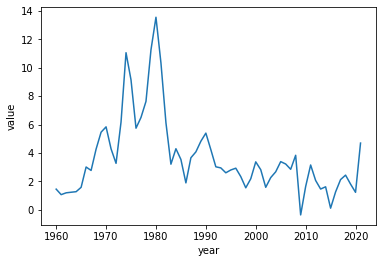

In [92]:
sns.lineplot(data=df, x='year', y='value')